<a href="https://colab.research.google.com/github/jelly12paw/o_o/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 제1유형

In [88]:
import numpy as np
import pandas as pd
import sklearn
import scipy.stats as ss # z스코어

from sklearn.preprocessing import MinMaxScaler

In [64]:
df = pd.read_csv('/content/drive/MyDrive/airquality.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


**1. 결측치 처리 후 평균의 차이**

In [66]:
# 결측치를 제외한 평균

df_o = df['Ozone']

df_o.dropna(axis = 0, inplace = True)

na_d = df_o.mean()

print('결측치를 제외한 평균 :', df_o.mean())

결측치를 제외한 평균 : 42.12931034482759


In [67]:
# 결측치를 0으로 대체한 평균

df_c = df['Ozone']

df_c.fillna(0, inplace = True)

na_0 = df_c.mean()

print('결측치를 0으로 대체한 평균 :', df_c.mean())

결측치를 0으로 대체한 평균 : 31.941176470588236


In [68]:
# 각 평균의 차이

print('평균의 차이 :', na_d - na_0)

평균의 차이 : 10.188133874239352


**2. 정규화 수행 후 평균의 차이**

In [98]:
# 최소최대 정규화

df_1 = df
mm = MinMaxScaler()

df_1[['Wind']] = mm.fit_transform(df_1[['Wind']])
mm_mean = df_1['Wind'].mean()

print('최소최대 정규화 평균 :', mm_mean)

최소최대 정규화 평균 : 0.4346061231510148


In [101]:
# Z-score 정규화

df_2 = df

z_mean = ss.zscore(df_2['Wind']).mean()

print('Z-score 평균 :', z_mean)

Z-score 평균 : 3.2508491178566673e-16


In [103]:
print('평균의 차이:', mm_mean - z_mean)

평균의 차이: 0.4346061231510145


**3. 월별 평균 기온**

In [83]:
df_mon = df.groupby('Month').mean()

df_mon['Temp']

Month
5    65.548387
6    79.100000
7    83.903226
8    83.967742
9    76.900000
Name: Temp, dtype: float64

In [84]:
print(df.groupby('Month')['Temp'].mean())

Month
5    65.548387
6    79.100000
7    83.903226
8    83.967742
9    76.900000
Name: Temp, dtype: float64


## 제2유형

In [116]:
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [107]:
df = pd.read_csv('/content/drive/MyDrive/Bank_Personal_Loan_Modelling.csv')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [117]:
# 훈련/테스트 데이터셋 분류 (7:3)

x = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]
y = df[['Personal Loan']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 1234)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 11) (1500, 11) (3500, 1) (1500, 1)


In [118]:
# 훈련 데이터 정규화

pre = preprocessing.Normalizer()

x_train = pre.fit_transform(x_train)
x_test = pre.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

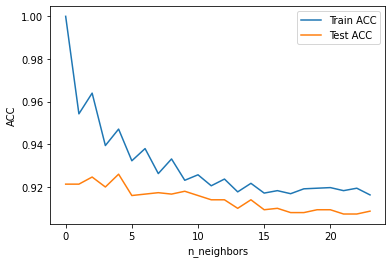

In [119]:
# 최적의 K값을 구한 후 시각화

train_acc = []
test_acc = []

for k in range(1, 25) :
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)

  train_acc.append(knn.score(x_train, y_train))
  test_acc.append(knn.score(x_test, y_test))

plt.plot(train_acc, label = 'Train ACC')
plt.plot(test_acc, label = 'Test ACC')
plt.ylabel('ACC')
plt.xlabel('n_neighbors')
plt.legend()


In [122]:
test_acc

[0.9213333333333333,
 0.9213333333333333,
 0.9246666666666666,
 0.92,
 0.926,
 0.916,
 0.9166666666666666,
 0.9173333333333333,
 0.9166666666666666,
 0.918,
 0.916,
 0.914,
 0.914,
 0.91,
 0.914,
 0.9093333333333333,
 0.91,
 0.908,
 0.908,
 0.9093333333333333,
 0.9093333333333333,
 0.9073333333333333,
 0.9073333333333333,
 0.9086666666666666]